## Time Series

1. Question. 1 What is time series?
2. Question. 2 What are the different types of time series?
3. Question. 3 What is stationary time series?
4. Question. 4 Eg of non stationary time series?
5. Question. 5 Eg of stationary time series?
6. Question. 6 Trend + Seaonal + Random Component in a time series?
7. Question. 7 What is forecasting in time series?
8. Question. 8 Methods of Forecasting
            1. Naive
            2. Exponential Smoothing
            3. Auto Regressive models
            4. Moving Average Models
            5. ARIMA AND ARMA models
            6. Using Machine Learning (Regression)
9. Question. 9 How do we evaluate performance of our forecaster?

In [1]:
from sktime.datasets import load_airline

In [2]:
airline = load_airline()

In [3]:
airline

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Airline, Length: 144, dtype: int64

In [4]:
from sktime.utils.plotting.forecasting import plot_ys

In [5]:
airline[0] = T + S + R # Additive Representation of components
airline[0] = T *S *R # MultiplicativeRepresentation of components

112

In [7]:
import matplotlib.pyplot as plt

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14726e62780>)

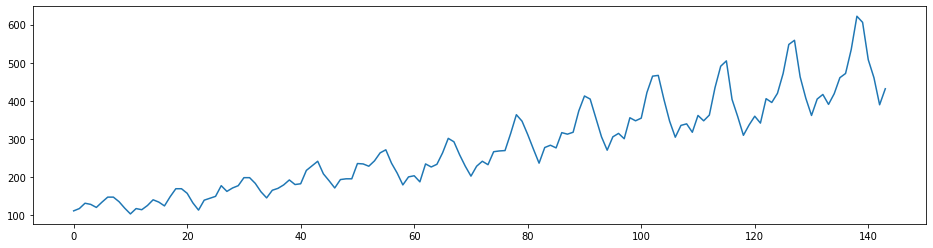

In [8]:
plot_ys(airline)

In [9]:
import pandas as pd

In [10]:
data = pd.DataFrame({"number":airline})

In [11]:
data

,number
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [14]:
ma = data.number.rolling(10).mean()

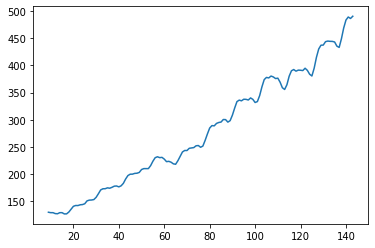

In [15]:
ma.plot()

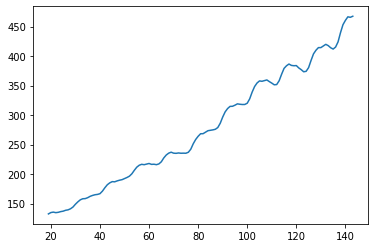

In [16]:
ma = data.number.rolling(20).mean()
ma.plot()

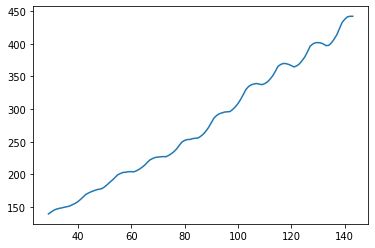

In [17]:
ma = data.number.rolling(30).mean()
ma.plot()

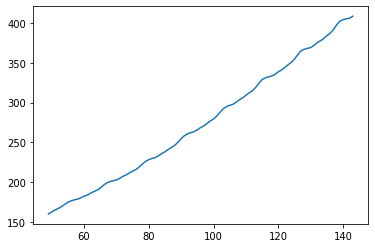

In [18]:
ma = data.number.rolling(50).mean()
ma.plot()

In [19]:
from sktime.performance_metrics.forecasting import smape_loss

In [20]:
from sktime.forecasting.naive import NaiveForecaster

In [22]:
import numpy as np
fh = np.arange(1, 37)

In [24]:
from sktime.forecasting.model_selection import temporal_train_test_split

In [25]:
y_train,y_test = temporal_train_test_split(airline)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1473887e748>)

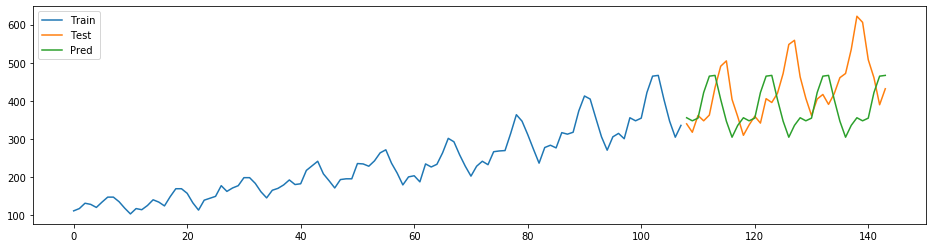

In [26]:
forecaster = NaiveForecaster(strategy="seasonal_last", sp = 10)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels = ["Train", "Test", "Pred"])

In [27]:
smape_loss(y_test, y_pred)

0.20645717030845467

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14738964898>)

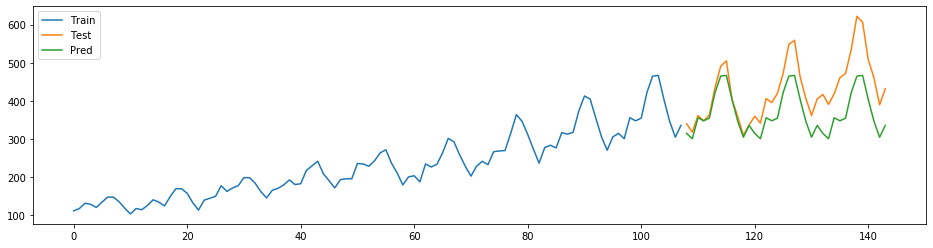

In [28]:
forecaster = NaiveForecaster(strategy="seasonal_last", sp = 12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_ys(y_train, y_test, y_pred, labels = ["Train", "Test", "Pred"])

In [29]:
smape_loss(y_test, y_pred)

0.145427686270316

In [ ]:
airline[0],airline[1],...,airline[-1], airline[n + 1], airline[n+2]
X1, X2, ..., Xn